In [220]:
%pylab inline
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [221]:
CsCoSp = loadtxt('./msp/input/gam_CsCo_400s.MCA')

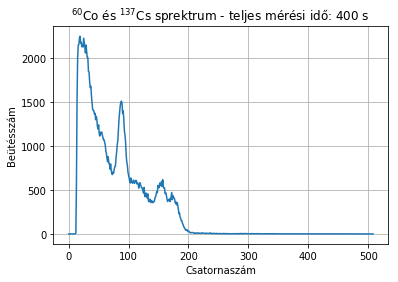

In [222]:
# ábrázolás
plt.plot(CsCoSp)
grid(True)
xlabel('Csatornaszám')
ylabel('Beütésszám')
title('$^{60}$Co és $^{137}$Cs sprektrum - teljes mérési idő: 400 s')
savefig('./CoCsSpektrum.png')

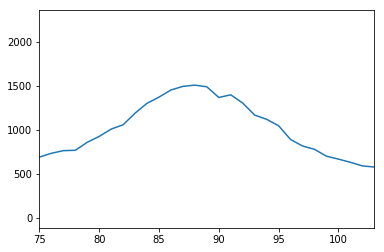

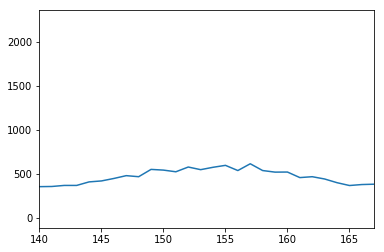

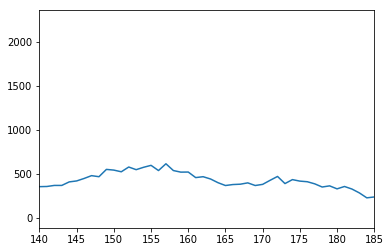

In [223]:
# gauss illesztés a három csúcsra
def gauss(x, A, mu, sigma, const):
    return A*np.exp(-(x-mu)**2 / (2*sigma**2)) + const

# első csúcs
plt.plot(CsCoSp)
xlim(75,103)
plt.show()

# második csúcs
plt.plot(CsCoSp)
xlim(140, 167)
plt.show()

# harmadik csúcs
plt.plot(CsCoSp)
xlim(140,185)
plt.show()

Parameters (A, mu, sigma, const):  [883.82397121  87.94720173   5.47708883 612.62095083] 
 Errors:			 [21.80606866  0.08093484  0.18915928 23.13049788]
Félérték szélesség :  12.897558556089967 +/- 0.08132715824968875


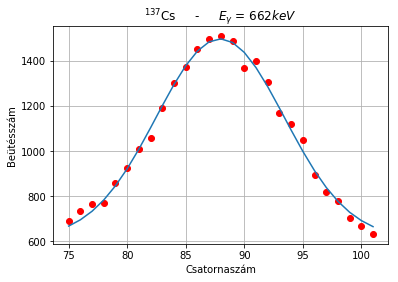

In [224]:
# első csúcs
popt, pcov = curve_fit(gauss, list(range(75, 102)), CsCoSp[75:102], p0=[1500, 87, 5, 500])
print('Parameters (A, mu, sigma, const): ', popt, '\n' , 'Errors:\t\t\t', sqrt(diag(pcov)))
perr = sqrt(diag(pcov))
print('Félérték szélesség : ', np.sqrt(np.log(2))*np.sqrt(2)*popt[2]*2, '+/-', np.sqrt(np.log(2))*np.sqrt(2)*perr[2]/popt[2]*2)

delta1 = np.sqrt(np.log(2))*np.sqrt(2)*popt[2]*2
delta1err = np.sqrt(np.log(2))*np.sqrt(2)*perr[2]/popt[2]*2

# első csúcs és illesztés ábra
plt.plot(list(range(75, 102)), CsCoSp[75:102], 'ro' ,label='Mért adatok')
plt.plot(list(range(75,102)), gauss(list(range(75,102)), *popt), label='Illesztett Gauss-görbe')
grid(True)
xlabel('Csatornaszám')
ylabel('Beütésszám')
title('$^{137}$Cs $\quad$ - $\quad$ $E_{\gamma}$ = $662 keV$')
firstPeakParams = popt
firstPeakErrors = perr

savefig('./Cs662csucsGauss.png')

Parameters (A, mu, sigma, const):  [269.75981988 154.28943429   7.04684659 310.4512632 ] 
 Errors:			 [32.81801275  0.25627768  0.90008775 35.26756233]
Félérték szélesség :  16.594055594525255 +/- 0.3007791726107013


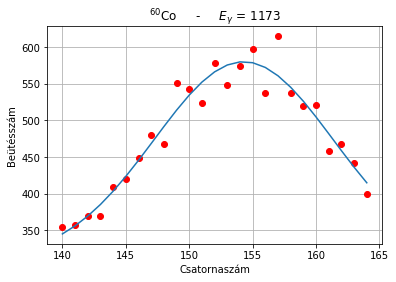

In [225]:
# második csúcs
popt, pcov = curve_fit(gauss, list(range(140, 165)), CsCoSp[140:165], p0=[260, 155, 3, 210])
print('Parameters (A, mu, sigma, const): ', popt, '\n' , 'Errors:\t\t\t', sqrt(diag(pcov)))
perr = sqrt(diag(pcov))
print('Félérték szélesség : ', np.sqrt(np.log(2))*np.sqrt(2)*popt[2]*2, '+/-', np.sqrt(np.log(2))*np.sqrt(2)*perr[2]/popt[2]*2)

delta2 = np.sqrt(np.log(2))*np.sqrt(2)*popt[2]*2
delta2err = np.sqrt(np.log(2))*np.sqrt(2)*perr[2]/popt[2]*2

# második csúcs és illesztés ábra
plt.plot(list(range(140, 165)), CsCoSp[140:165], 'ro' ,label='Mért adatok')
plt.plot(list(range(140,165)), gauss(list(range(140,165)), *popt), label='Illesztett Gauss-görbe')
grid(True)
xlabel('Csatornaszám')
ylabel('Beütésszám')
title('$^{60}$Co $\quad$ - $\quad$ $E_{\gamma}$ = $1173 ~keV$')
secondPeakParams = popt
secondPeakErrors = perr

savefig('./Co1173csucsGauss.png')

Parameters (A, mu, sigma, const):  [ 66.34222912 172.87381769   2.36676531 369.22887892] 
 Errors:			 [17.35362647  0.57754763  0.88436531 13.8874578 ]
Félérték szélesség :  5.573306394389276 +/- 0.8799018476242425


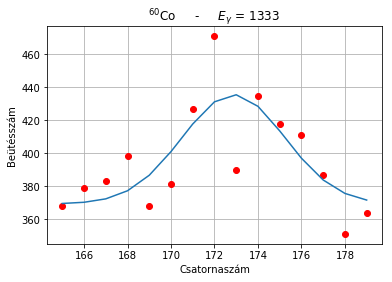

In [226]:
# harmadik csúcs -> ez jó ronda, de nagyon sok baszogatás után sem lett ennél jobb sajna
popt, pcov = curve_fit(gauss, list(range(165, 180)), CsCoSp[165:180], p0=[450, 171, 3, 365])
perr = sqrt(diag(pcov))
print('Parameters (A, mu, sigma, const): ', popt, '\n' , 'Errors:\t\t\t', sqrt(diag(pcov)))
print('Félérték szélesség : ', np.sqrt(np.log(2))*np.sqrt(2)*popt[2]*2, '+/-', np.sqrt(np.log(2))*np.sqrt(2)*perr[2]/popt[2]*2)

delta3 = np.sqrt(np.log(2))*np.sqrt(2)*popt[2]*2
delta3err = np.sqrt(np.log(2))*np.sqrt(2)*perr[2]/popt[2]*2

# második csúcs és illesztés ábra
plt.plot(list(range(165, 180)), CsCoSp[165:180], 'ro' ,label='Mért adatok')
plt.plot(list(range(165,180)), gauss(list(range(165,180)), *popt), label='Illesztett Gauss-görbe')
grid(True)
xlabel('Csatornaszám')
ylabel('Beütésszám')
title('$^{60}$Co $\quad$ - $\quad$ $E_{\gamma}$ = $1333 ~keV$')
thirdPeakParams = popt
thirdPeakErrors = perr

savefig('./Co1333csucsGauss.png')

Params (m, b): [  7.84836209 -29.97904946] 
 Errors:		 [ 0.1619398  23.17215959]


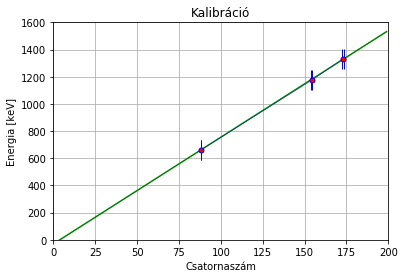

In [227]:
# kalibráció
channel = [firstPeakParams[1], secondPeakParams[1], thirdPeakParams[1]]
channelErr = [firstPeakErrors[1], secondPeakErrors[1], thirdPeakErrors[1]]

energies = [662, 1173, 1333] # keV

def egyenes(x, m, b):
    return np.dot(m,x)+b

popt1, pcov = curve_fit(egyenes, channel, energies)
perr = sqrt(diag(pcov))

print('Params (m, b):', popt1, '\n', 'Errors:\t\t', perr)

plt.errorbar(channel, energies, xerr=channelErr, capsize = 10, color = 'blue',
             marker='o', ms=5, mfc='red', lw=0.3)
plt.plot(list(range(0,200)), egyenes(list(range(0,200)), *popt1), 'g')

xlabel('Csatornaszám')
ylabel('Energia [keV]')
xlim(0,200)
ylim(0,1600)
grid(True)
title('Kalibráció')

savefig('./CsCoKalibracio.png')

# nem tudom, hogy itt a b-nek miért ilyen nagy a hibája

In [228]:
print('Félérték szélesség az elsőre: ', delta1*popt1[0] + popt1[1], '+/-',
     np.sqrt((delta1err*popt1[0])**2 + perr[1]**2 + (delta1*perr[0])**2), 'keV')
print('Félérték szélesség a másodikra: ', delta2*popt1[0] + popt1[1], '+/-',
     np.sqrt((delta2err*popt1[0])**2 + perr[1]**2 + (delta2*perr[0])**2), 'keV')
print('Félérték szélesség a harmadikra: ', delta3*popt1[0] + popt1[1], '+/-',
     np.sqrt((delta3err*popt1[0])**2 + perr[1]**2 + (delta3*perr[0])**2), 'keV')

Félérték szélesség az elsőre:  71.24566017014843 +/- 23.27485241376189 keV
Félérték szélesség a másodikra:  100.25710739523983 +/- 23.446594063572746 keV
Félérték szélesség a harmadikra:  13.762277161031733 +/- 24.19614578719331 keV


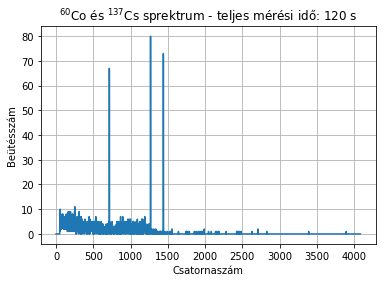

In [229]:
# HPGe - High Purity Germanium detektor - Co, Cs spektrum
CsCoSp = loadtxt('./hpge/gam_CsCo_120s.mca')

plt.plot(CsCoSp)
grid(True)
xlabel('Csatornaszám')
ylabel('Beütésszám')
title('$^{60}$Co és $^{137}$Cs sprektrum - teljes mérési idő: 120 s')
savefig('./CoCsHPGeSpektrum.png')

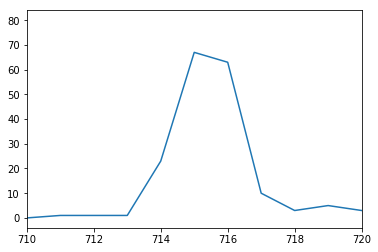

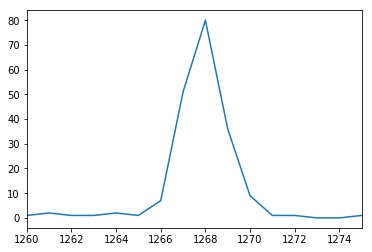

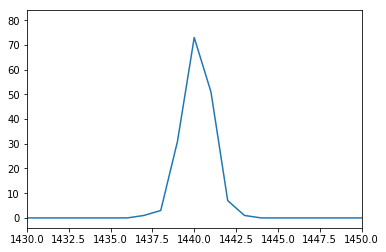

In [230]:
# csúcsok

# első csúcs
plt.plot(CsCoSp)
xlim(710,720)
plt.show()

# második csúcs
plt.plot(CsCoSp)
xlim(1260, 1275)
plt.show()

# harmadik csúcs
plt.plot(CsCoSp)
xlim(1430,1450)
plt.show()

Parameters (A, mu, sigma, const):  [ 76.11981229 715.40425628   0.83982041   1.37591068] 
 Errors:			 [3.1609304  0.03753345 0.04572996 1.27273931]
Félérték szélesség :  1.9776259330470995 +/- 0.1282248209536911


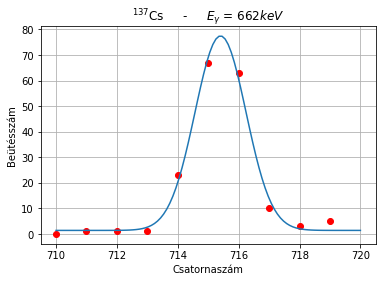

In [231]:
# itt is meghagytam a konstanssal eltolt Gausst, bár lényegében mindegy, mert itt ~0 háttér van

# első csúcs
popt, pcov = curve_fit(gauss, list(range(710,720)), CsCoSp[710:720], p0=[150, 713, 2, 0])
print('Parameters (A, mu, sigma, const): ', popt, '\n' , 'Errors:\t\t\t', sqrt(diag(pcov)))
perr = sqrt(diag(pcov))
print('Félérték szélesség : ', np.sqrt(np.log(2))*np.sqrt(2)*popt[2]*2, '+/-', np.sqrt(np.log(2))*np.sqrt(2)*perr[2]/popt[2]*2)

delta1 = np.sqrt(np.log(2))*np.sqrt(2)*popt[2]*2
delta1err = np.sqrt(np.log(2))*np.sqrt(2)*perr[2]/popt[2]*2

# első csúcs és illesztés ábra
plt.plot(list(range(710,720)), CsCoSp[710:720], 'ro' ,label='Mért adatok')
plt.plot(np.linspace(710,720,100), gauss(np.linspace(710,720, 100), *popt), label='Illesztett Gauss-görbe')
grid(True)
xlabel('Csatornaszám')
ylabel('Beütésszám')
title('$^{137}$Cs $\quad$ - $\quad$ $E_{\gamma}$ = $662 keV$')
firstPeakParams = popt
firstPeakErrors = perr

savefig('./Cs662HPGeCsucsGauss.png')

Parameters (A, mu, sigma, const):  [7.99578318e+01 1.26787593e+03 8.84430278e-01 1.04922663e+00] 
 Errors:			 [1.4689497  0.01856138 0.01924579 0.45947444]
Félérték szélesség :  2.0826741470103496 +/- 0.051242446872934284


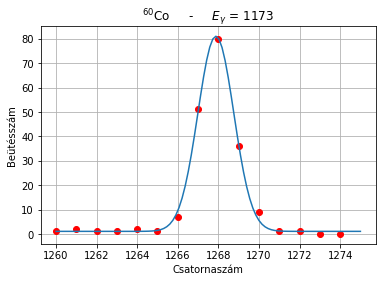

In [232]:
# második csúcs
popt, pcov = curve_fit(gauss, list(range(1260, 1275)), CsCoSp[1260:1275], p0=[100, 1268, 2, 2])
print('Parameters (A, mu, sigma, const): ', popt, '\n' , 'Errors:\t\t\t', sqrt(diag(pcov)))
perr = sqrt(diag(pcov))
print('Félérték szélesség : ', np.sqrt(np.log(2))*np.sqrt(2)*popt[2]*2, '+/-', np.sqrt(np.log(2))*np.sqrt(2)*perr[2]/popt[2]*2)

delta2 = np.sqrt(np.log(2))*np.sqrt(2)*popt[2]*2
delta2err = np.sqrt(np.log(2))*np.sqrt(2)*perr[2]/popt[2]*2

# második csúcs és illesztés ábra
plt.plot(list(range(1260, 1275)), CsCoSp[1260:1275], 'ro' ,label='Mért adatok')
plt.plot(np.linspace(1260, 1275, 100), gauss(np.linspace(1260, 1275, 100), *popt), label='Illesztett Gauss-görbe')
grid(True)
xlabel('Csatornaszám')
ylabel('Beütésszám')
title('$^{60}$Co $\quad$ - $\quad$ $E_{\gamma}$ = $1173 ~keV$')
secondPeakParams = popt
secondPeakErrors = perr

savefig('./Co1173HPGeCsucsGauss.png')

Parameters (A, mu, sigma, const):  [ 7.56673494e+01  1.44019349e+03  8.80993085e-01 -4.89050929e-03] 
 Errors:			 [0.74980081 0.00999354 0.01030923 0.19305708]
Félérték szélesség :  2.0745801763963754 +/- 0.027555709503685535


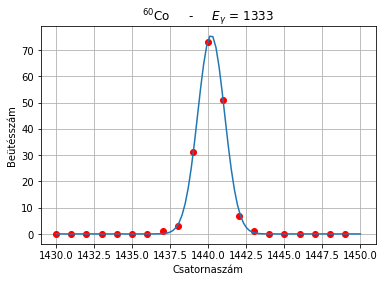

In [233]:
# harmadik csúcs -> ez jó ronda, de nagyon sok baszogatás után sem lett ennél jobb sajna
popt, pcov = curve_fit(gauss, list(range(1430,1450)), CsCoSp[1430:1450], p0=[100, 1440, 3, 0.1])
perr = sqrt(diag(pcov))
print('Parameters (A, mu, sigma, const): ', popt, '\n' , 'Errors:\t\t\t', sqrt(diag(pcov)))
print('Félérték szélesség : ', np.sqrt(np.log(2))*np.sqrt(2)*popt[2]*2, '+/-', np.sqrt(np.log(2))*np.sqrt(2)*perr[2]/popt[2]*2)

delta3 = np.sqrt(np.log(2))*np.sqrt(2)*popt[2]*2
delta3err = np.sqrt(np.log(2))*np.sqrt(2)*perr[2]/popt[2]*2

# második csúcs és illesztés ábra
plt.plot(list(range(1430,1450)), CsCoSp[1430:1450], 'ro' ,label='Mért adatok')
plt.plot(np.linspace(1430,1450, 100), gauss(np.linspace(1430,1450, 100), *popt), label='Illesztett Gauss-görbe')
grid(True)
xlabel('Csatornaszám')
ylabel('Beütésszám')
title('$^{60}$Co $\quad$ - $\quad$ $E_{\gamma}$ = $1333 ~keV$')
thirdPeakParams = popt
thirdPeakErrors = perr

savefig('./Co1333HPGeCsucsGauss.png')

Params (m, b): [ 0.92557835 -0.2310341 ] 
 Errors:		 [6.87053123e-04 8.12266986e-01]


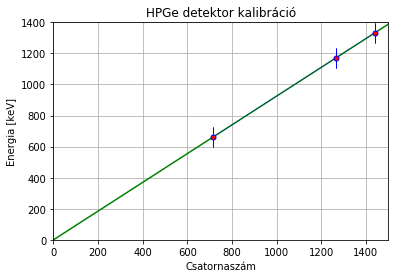

In [234]:
# HPGe kalibráció

channel = [firstPeakParams[1], secondPeakParams[1], thirdPeakParams[1]]
channelErr = [firstPeakErrors[1], secondPeakErrors[1], thirdPeakErrors[1]]

energies = [662, 1173, 1333] # keV

def egyenes(x, m, b):
    return np.dot(m,x)+b

popt, pcov = curve_fit(egyenes, channel, energies)
perr = sqrt(diag(pcov))

print('Params (m, b):', popt, '\n', 'Errors:\t\t', perr)

plt.errorbar(channel, energies, xerr=channelErr, capsize = 10, color = 'blue',
             marker='o', ms=5, mfc='red', lw=0.3)
plt.plot(list(range(0,1500)), egyenes(list(range(0,1500)), *popt), 'g')

xlabel('Csatornaszám')
ylabel('Energia [keV]')
xlim(0,1500)
ylim(0,1400)
grid(True)
title('HPGe detektor kalibráció')

savefig('./CsCoHPGeKalibracio.png')

In [235]:
print('Félérték szélesség az elsőre: ', delta1*popt[0] + popt[1], '+/-',
     np.sqrt((delta1err*popt[0])**2 + perr[1]**2 + (delta1*perr[0])**2), 'keV')
print('Félérték szélesség a másodikra: ', delta2*popt[0] + popt[1], '+/-',
     np.sqrt((delta2err*popt[0])**2 + perr[1]**2 + (delta2*perr[0])**2), 'keV')
print('Félérték szélesség a harmadikra: ', delta3*popt[0] + popt[1], '+/-',
     np.sqrt((delta3err*popt[0])**2 + perr[1]**2 + (delta3*perr[0])**2), 'keV')

popt2 = popt
perr2 = perr

Félérték szélesség az elsőre:  1.599413636674062 +/- 0.8208927744729544 keV
Félérték szélesség a másodikra:  1.6966439888640696 +/- 0.8136517706777887 keV
Félérték szélesség a harmadikra:  1.6891523849260188 +/- 0.8126685615637754 keV


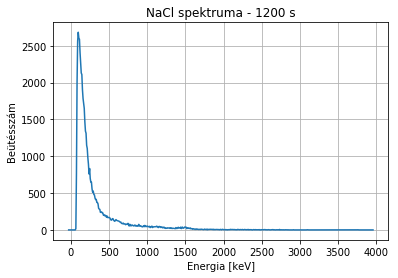

In [236]:
# sók mérése
NaClSp = loadtxt('./msp/input/gam_NaCl_1200s_hatter.mca')
KClSp = loadtxt('./msp/input/gam_KCl_600s_hatter.mca')

# NaCl spektrum

channels = np.arange(0,509, 1)
energies = egyenes(channels, *popt1)

plt.plot(energies, NaClSp)
xlabel('Energia [keV]')
ylabel('Beütésszám')
grid(True)
title('NaCl spektruma - 1200 s')

savefig('./NaClspektrum.png')

Params (A, mu, sigma, const): [ 25.49278007 190.75948112  10.6250049    6.61261944] 
 Errors:		 [3.09514254 1.00133638 1.91970906 3.19665171]
Félérték szélesség az elsőre:  22.92691253856515 +/- 0.9028580434730891 keV


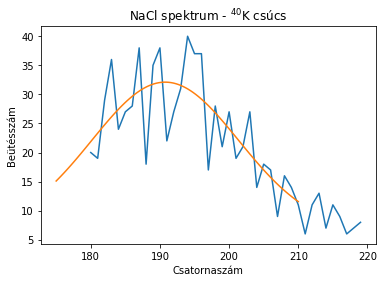

In [237]:
# csúcs illesztése

fr = 180
to = 220

plt.plot(list(range(fr,to)), NaClSp[fr:to])

popt, pcov = curve_fit(gauss, list(range(fr, to)),
                      NaClSp[fr:to], p0=[80, 193, 5, 16])
perr = sqrt(diag(pcov))

delta1 = np.sqrt(np.log(2))*np.sqrt(2)*popt[2]*2
delta1err = np.sqrt(np.log(2))*np.sqrt(2)*perr[2]/popt[2]*2

print('Params (A, mu, sigma, const):', popt, '\n', 'Errors:\t\t', perr)
print('Félérték szélesség az elsőre: ', delta1*popt2[0] + popt2[1], '+/-',
     np.sqrt((delta1err*popt2[0])**2 + perr2[1]**2 + (delta1*perr2[0])**2), 'keV')

# ez elég fos, de sztem azért mert alig van csúcs
# a hattérhez képest

plt.plot(np.linspace(175, 210, 100),
         gauss(np.linspace(175, 210, 100), *popt))

xlabel('Csatornaszám')
ylabel('Beütésszám')
title('NaCl spektrum - $^{40}$K csúcs')

savefig('./NaClcsucsGauss.png')

A1 = popt[0]*popt[2]
A1err = np.sqrt(perr[0]**2 + perr[2]**2)

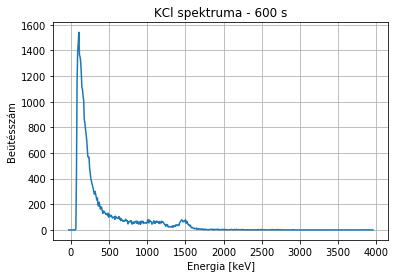

In [238]:
# KCl spektrum

channels = np.arange(0,509, 1)
energies = egyenes(channels, *popt1)

plt.plot(energies, KClSp)
xlabel('Energia [keV]')
ylabel('Beütésszám')
grid(True)
title('KCl spektruma - 600 s')

savefig('./KClspektrum.png')

Params (A, mu, sigma, const): [ 56.78552294 191.23700182   7.18720388  15.84877486] 
 Errors:		 [5.23849878 0.38934025 0.91770631 5.56211874]
Félérték szélesség az elsőre:  15.433983048444409 +/- 0.8586991780714813 keV


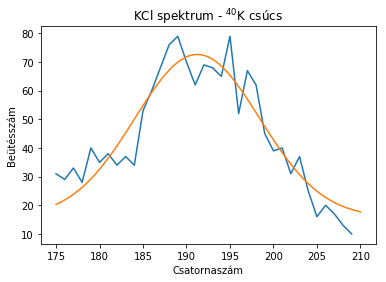

In [239]:
# csúcs illesztése

plt.plot(list(range(175,210)), KClSp[175:210])

popt, pcov = curve_fit(gauss, list(range(175, 210)),
                      KClSp[175:210], p0=[140, 193, 5, 16])
perr = sqrt(diag(pcov))

delta1 = np.sqrt(np.log(2))*np.sqrt(2)*popt[2]*2
delta1err = np.sqrt(np.log(2))*np.sqrt(2)*perr[2]/popt[2]*2

print('Params (A, mu, sigma, const):', popt, '\n', 'Errors:\t\t', perr)
print('Félérték szélesség az elsőre: ', delta1*popt2[0] + popt2[1], '+/-',
     np.sqrt((delta1err*popt2[0])**2 + perr2[1]**2 + (delta1*perr2[0])**2), 'keV')

# ez elég fos, de sztem azért mert alig van csúcs
# a hattérhez képest

plt.plot(np.linspace(175, 210, 100),
         gauss(np.linspace(175, 210, 100), *popt))

xlabel('Csatornaszám')
ylabel('Beütésszám')
title('KCl spektrum - $^{40}$K csúcs')

savefig('./KClcsucsGauss.png')

A2 = popt[0]*popt[2]
A2err = np.sqrt(perr[0]**2 + perr[2]**2)

In [240]:
# Kálium arány 1:2
print('NaCl : KCl K arány - ', A1/A2, '+/-', (A1err/A1 + A2err/A2)*A1/A2)

NaCl : KCl K arány -  0.6636647390790441 +/- 0.017572116931910818
